# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [11]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from skimage.filters import gaussian


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

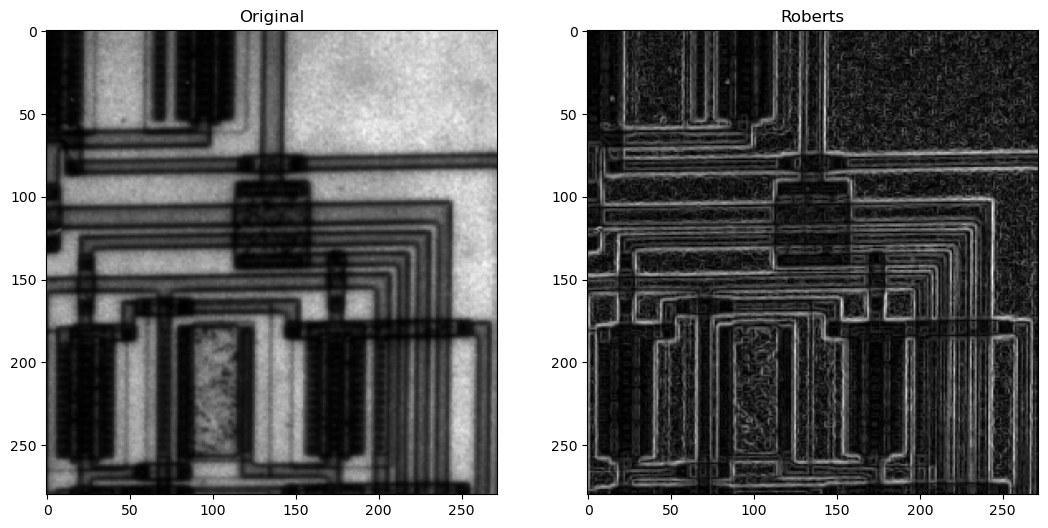

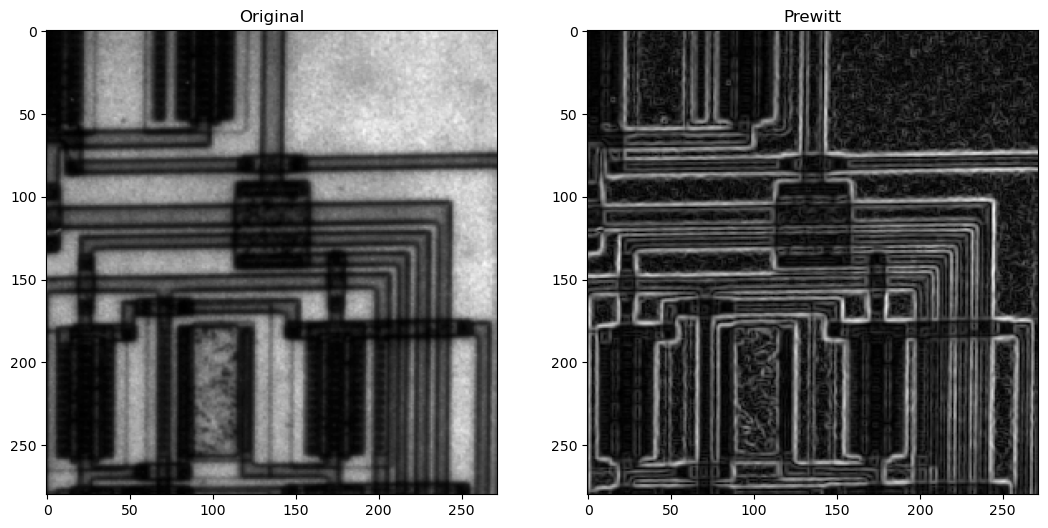

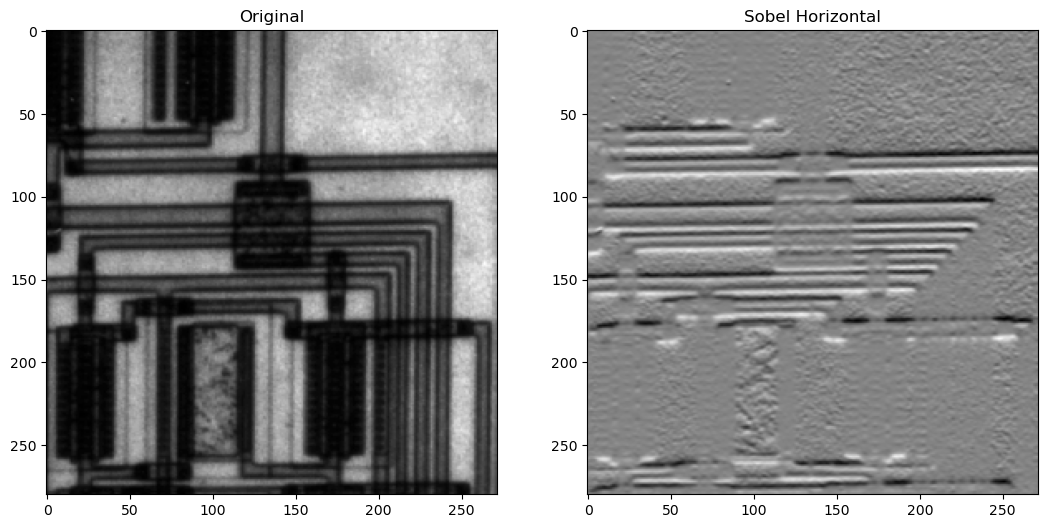

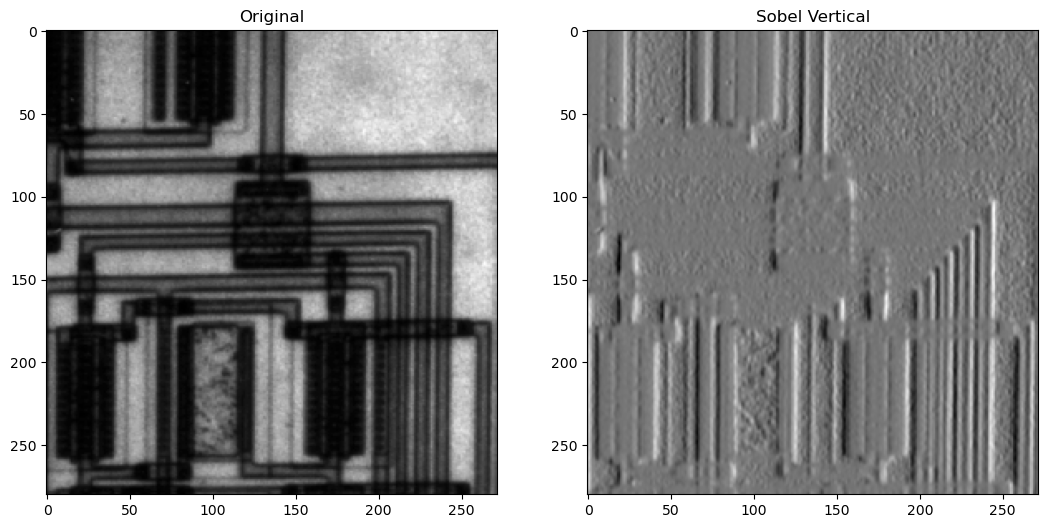

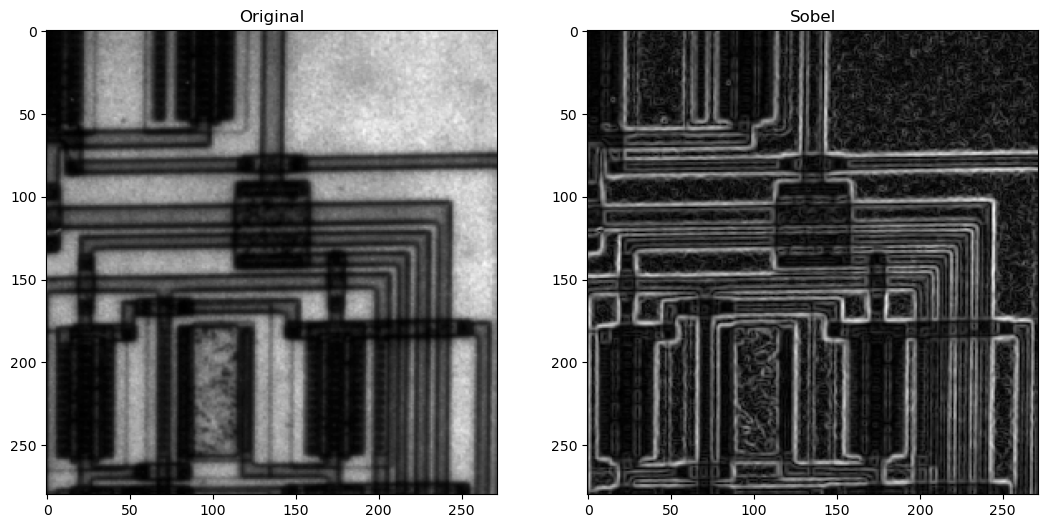

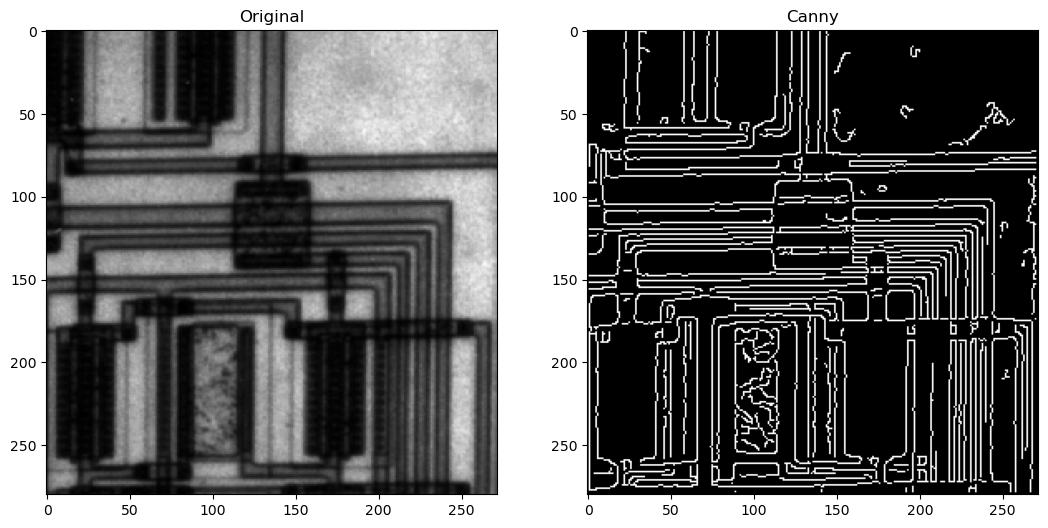

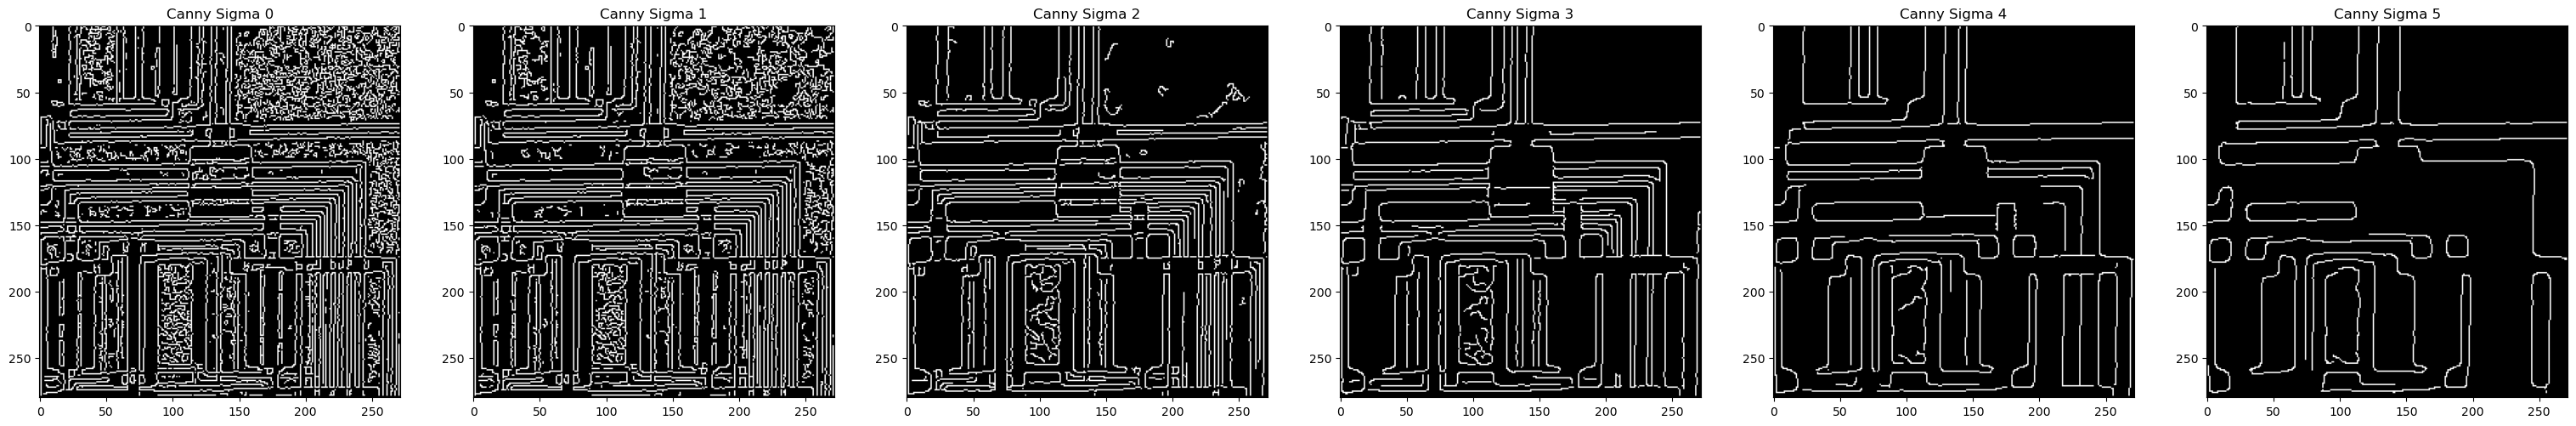

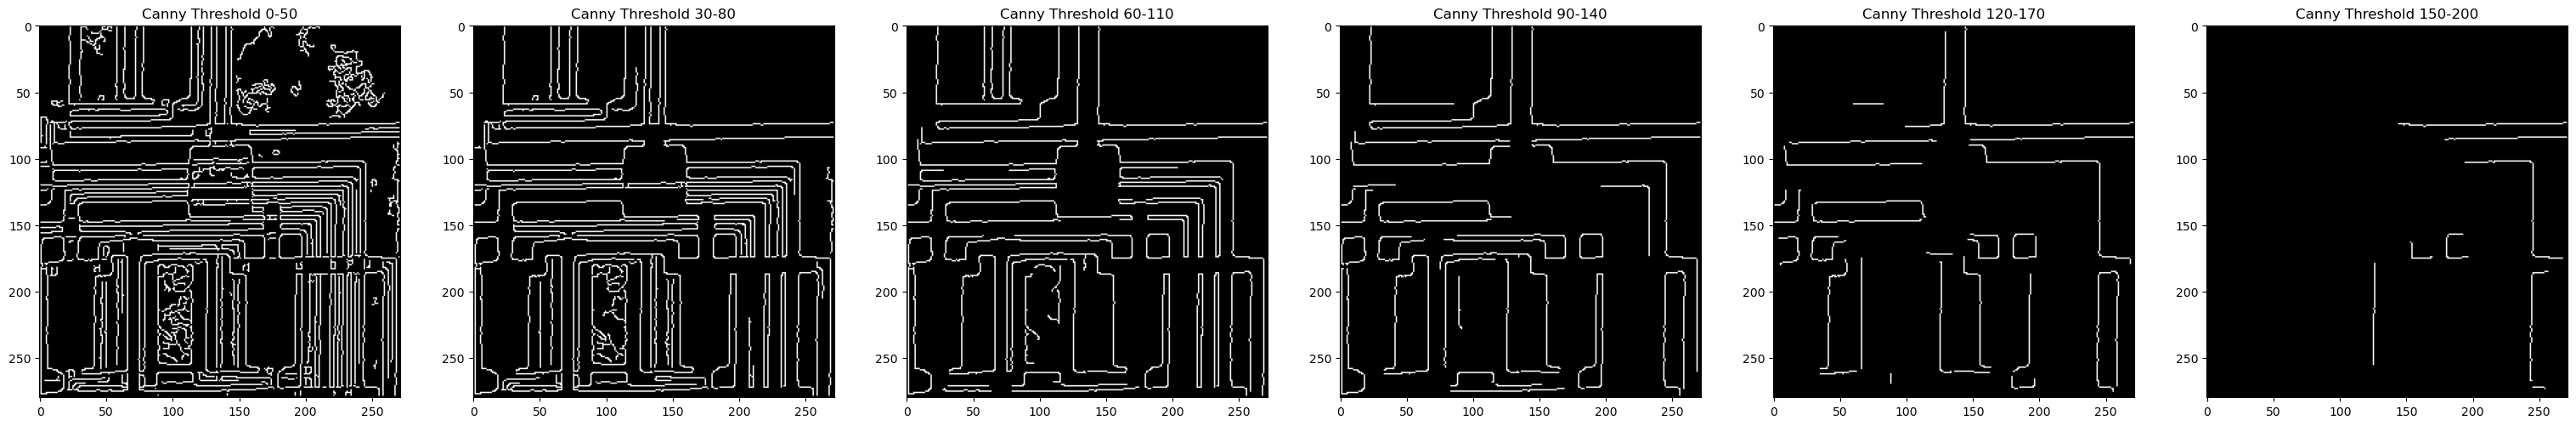

In [ ]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

img = io.imread('circuit.tif')
# NOTE: image is already grayscale
roberts_img = roberts(img) #Roberts is very sensitive to small changes, produces sharp lines, but more sensitive to noise.
prewitt_img = prewitt(img)#Less sensitive to noise compared to Roberts.
sobel_h_img = sobel_h(img)#Sobel Horizontal detects only horizontal edges.
sobel_v_img = sobel_v(img)#Sobel Vertical detects only vertical edges.
sobel_img = sobel(img)#Less sensitive to noise than Roberts.
canny_img = canny(img)#Canny provides the best results, uses Gaussian smoothing then edge detection.
show_images([img, roberts_img], ['Original', 'Roberts'])
show_images([img, prewitt_img], ['Original', 'Prewitt'])
show_images([img, sobel_h_img], ['Original', 'Sobel Horizontal'])
show_images([img, sobel_v_img], ['Original', 'Sobel Vertical'])
show_images([img, sobel_img], ['Original', 'Sobel'])
show_images([img, canny_img], ['Original', 'Canny'])


canny_sigma_images = [canny(
    img,
    sigma=(0 + i * 0.5),
  ) for i in range(6)]

show_images(canny_sigma_images, ['Canny Sigma {}'.format(i) for i in range(6)])
# NOTE: effect of sigma in canny is to smooth the image before applying the edge detection
# NOTE: higher sigma means more smoothing + less noise + less edges detected
# NOTE: lower sigma means less smoothing + more noise + more edges detected

canny_threshold_images = [canny(
    img,
    low_threshold=(0 + i * 30),
    high_threshold=(50 + i * 30),
  ) for i in range(6)]

show_images(canny_threshold_images, ['Canny Threshold {}-{}'.format(0 + i * 30, 50 + i * 30) for i in range(6)])
# effect of threshold in canny is to filter out edges that are not in the correct range


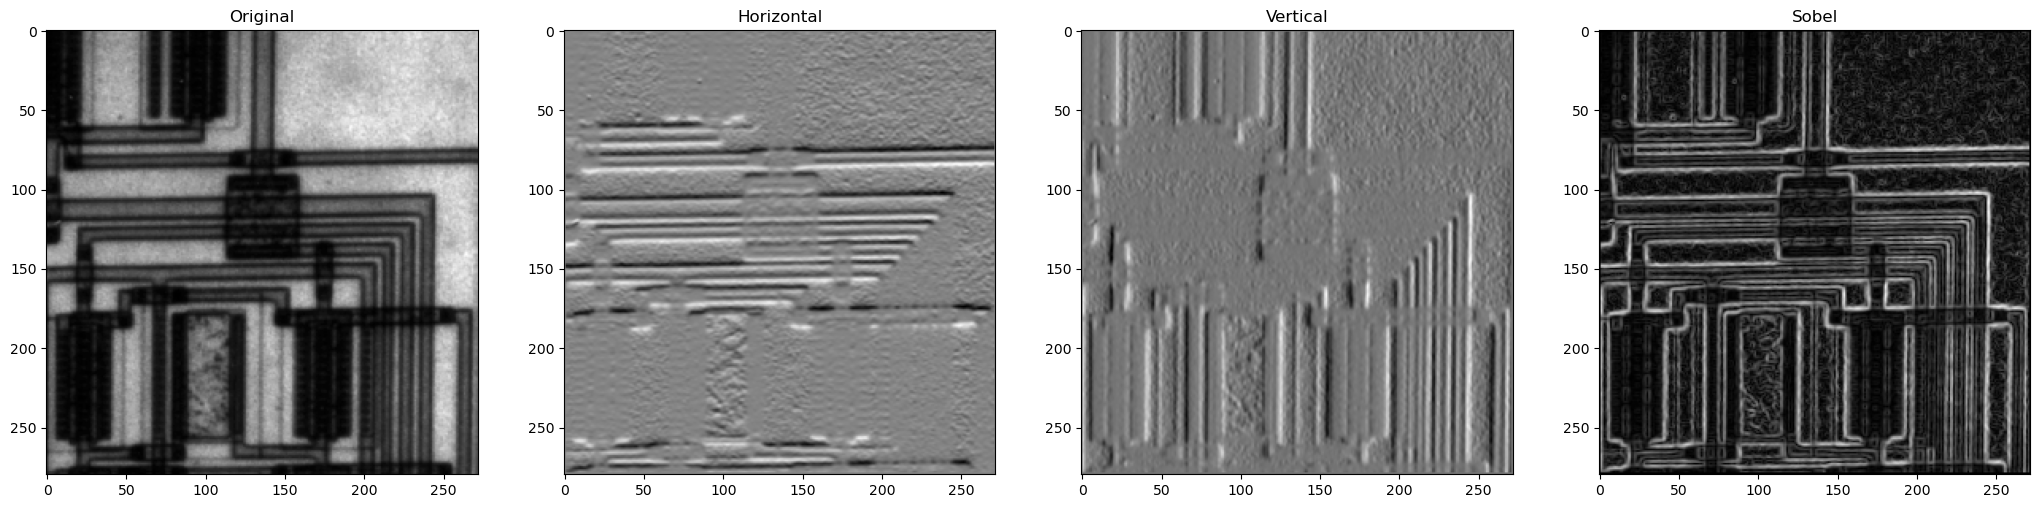

In [56]:
# 2. Custom Sobel (V-H-Both)

def custom_sobel(img, threshold=0):
  HX_FILTER = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
  ])
  HY_FILTER = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
  ])
  img_hx = np.zeros(img.shape)
  img_hy = np.zeros(img.shape)
  img_sobel = np.zeros(img.shape)
  
  for i in range(1, img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
      img_hx[i, j] = np.sum(HX_FILTER * img[i-1:i+2, j-1:j+2])
      img_hy[i, j] = np.sum(HY_FILTER * img[i-1:i+2, j-1:j+2])
      
      img_sobel[i, j] = np.sqrt(img_hx[i, j] ** 2 + img_hy[i, j] ** 2)
      
  img_sobel[img_sobel < threshold] = 0

  show_images([img, img_hx, img_hy, img_sobel], ['Original', 'Horizontal', 'Vertical', 'Sobel'])
      
  
custom_sobel(img, threshold=0)
#this means than skimage sobel is applying gaussian filter before applying the sobel filter
# custom_sobel(gaussian(img, sigma=1), threshold=0)

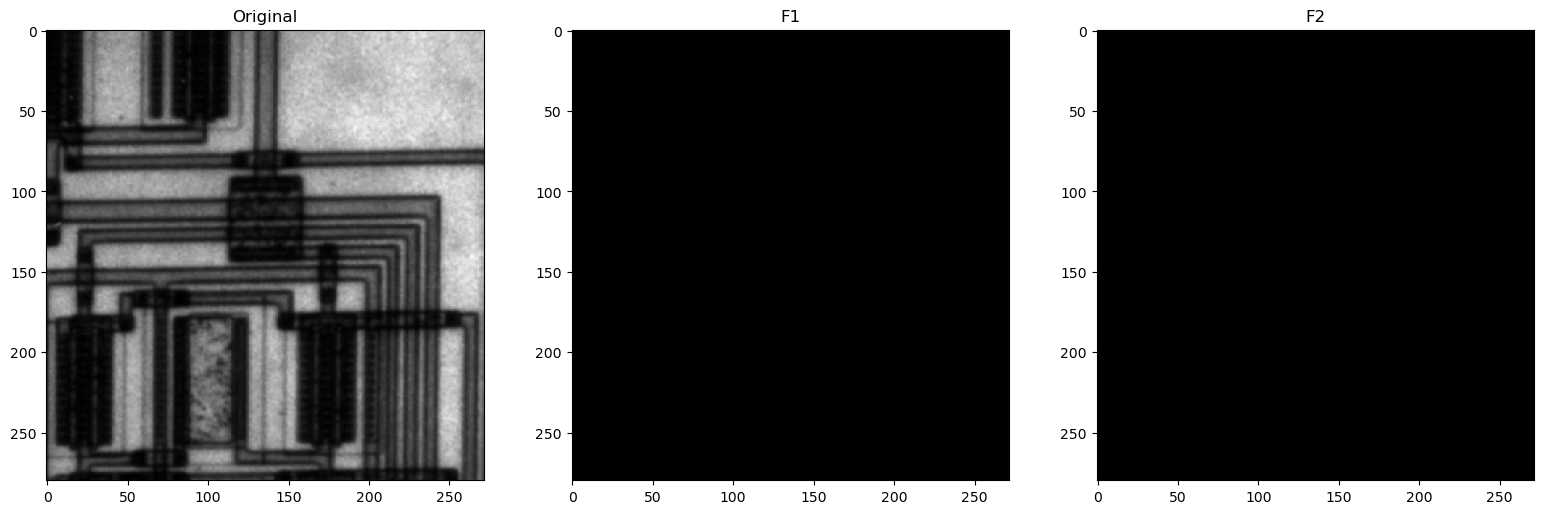

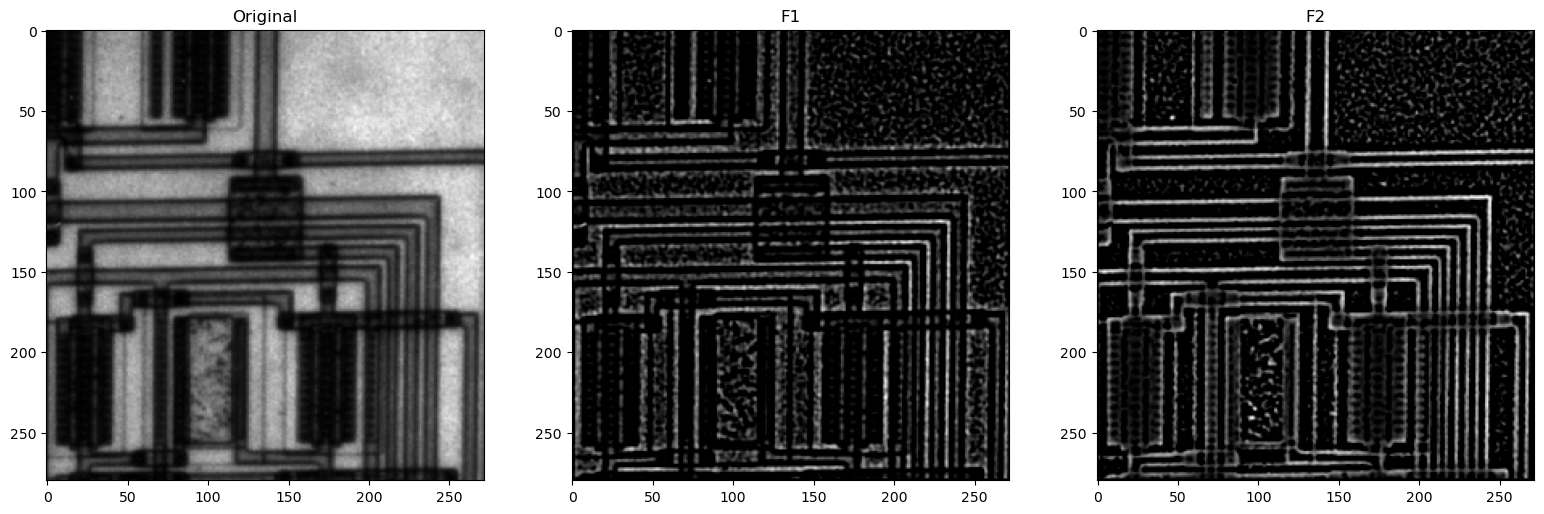

In [40]:
# 3. Custom LoG
thres= 20
def custom_Log(img, threshold=0, sigma=1):
    smoothed_img = gaussian(img, sigma=sigma)
    F1_FILTER = np.array([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1],
    ])
    F2_FILTER = np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0],
    ])
    img_f1 = np.zeros(img.shape)
    img_f2 = np.zeros(img.shape)
    for i in range(1, smoothed_img.shape[0] - 1):
        for j in range(1, smoothed_img.shape[1] - 1):
            img_f1[i, j] = np.sum(F1_FILTER * smoothed_img[i-1:i+2, j-1:j+2])
            img_f2[i, j] = np.sum(F2_FILTER * smoothed_img[i-1:i+2, j-1:j+2])
            
    img_f1[img_f1 < threshold] = 0
    img_f2[img_f2 < threshold] = 0

    show_images([img, img_f1, img_f2], ['Original', 'F1', 'F2'])
    
    
custom_Log(img, threshold=thres, sigma=1)

custom_Log(img, threshold = 0, sigma=1)


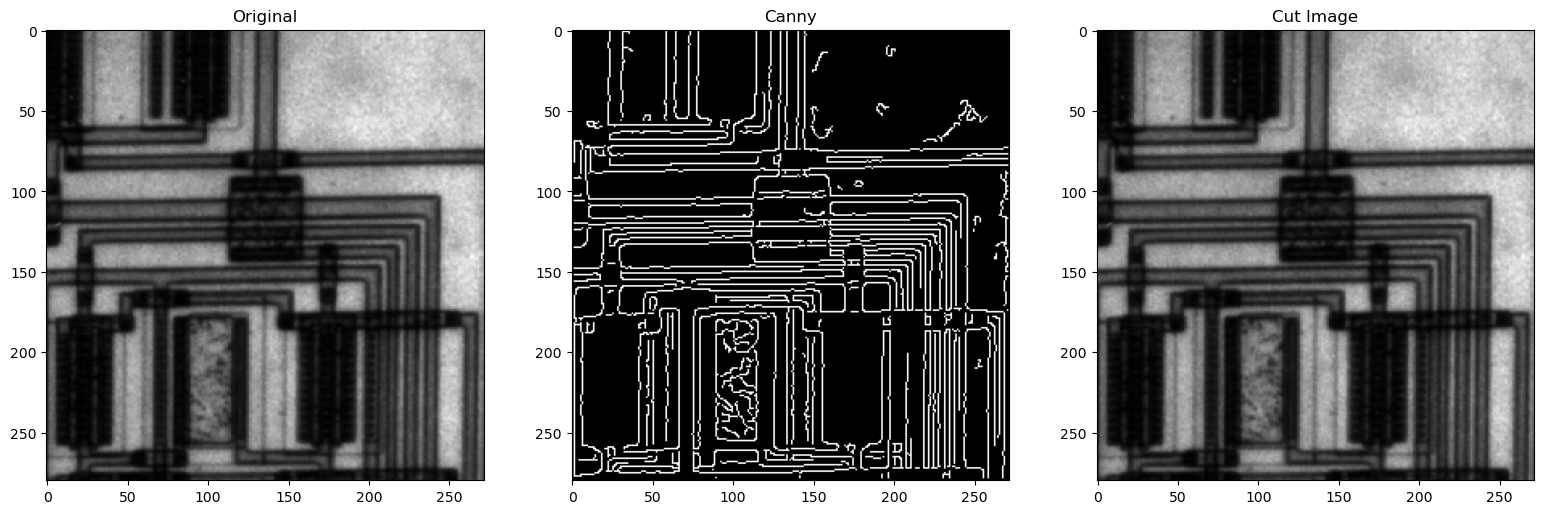

In [55]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

canny_img = canny(img)
canny_img = canny_img * 0.5
cut_image = img - canny_img
show_images([img, canny_img, cut_image], ['Original', 'Canny', 'Cut Image'])
#this is a way to make remove edges if factor is high 